IMPORTING DEPENDENCIES

In [1]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

PRE_PROCESSING

In [2]:
#Loading the data
df = pd.read_csv("housing.csv")

In [3]:
#getting the dummies for the String values
data = pd.get_dummies(df, dtype = int)

In [4]:
#Dropping the null rows
data.dropna(inplace=True)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'ocean_proximity_<1H OCEAN'}>,
        <Axes: title={'center': 'ocean_proximity_INLAND'}>,
        <Axes: title={'center': 'ocean_proximity_ISLAND'}>],
       [<Axes: title={'center': 'ocean_proximity_NEAR BAY'}>,
        <Axes: title={'center': 'ocean_proximity_NEAR OCEAN'}>, <Axes: >,
        <Axes: >]], dtype=object)

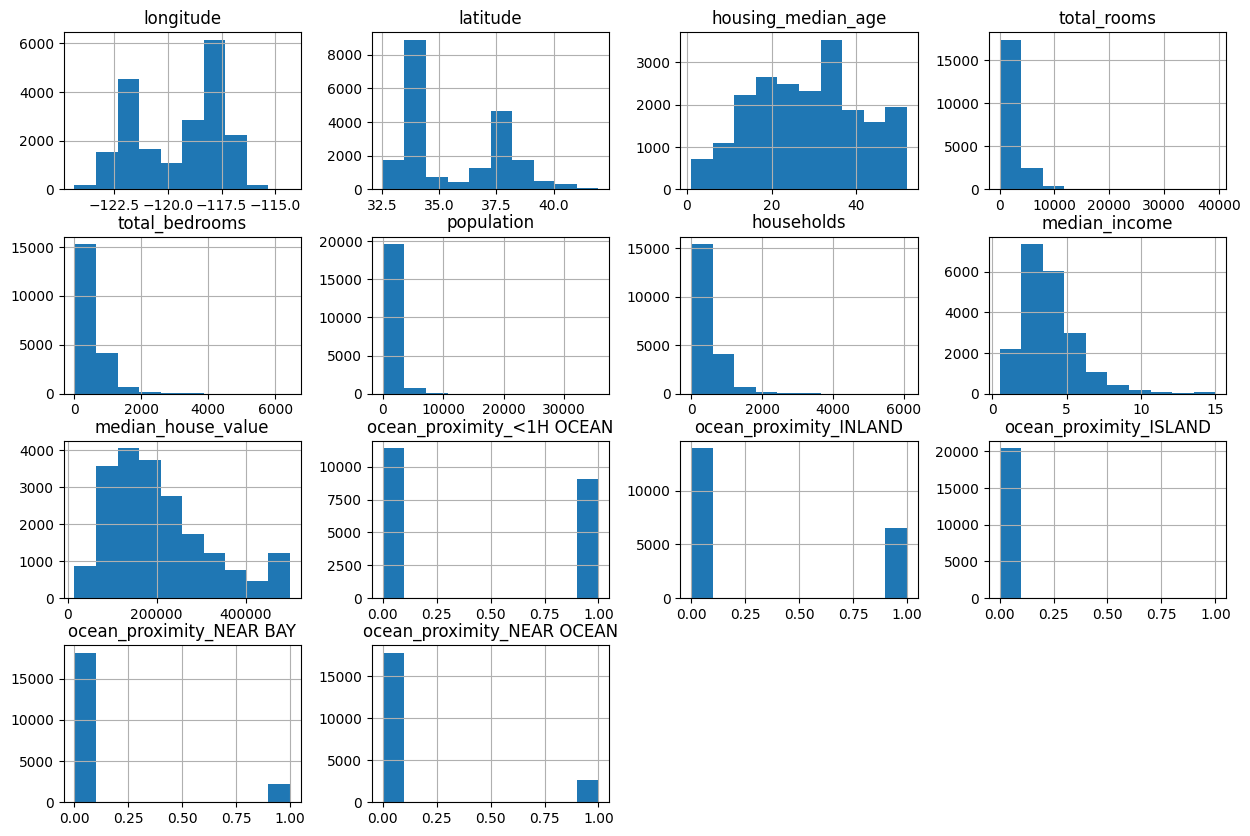

In [5]:
#Lets see the data Distribution
data.hist(figsize=(15,10))

In [6]:
#Importing numpy to make the Skewed features to normally distributed
import numpy as np

data['median_income'] = np.log(data['median_income'])
data['population'] = np.log(data['population'])
data['total_rooms'] = np.log(data['total_rooms'])
data['total_bedrooms'] = np.log(data['total_bedrooms'])
data['median_house_value'] = np.log(data['median_house_value'])
data['households'] = np.log(data['households'])
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,4.836282,2.119287,13.022764,0,0,0,1,0
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,7.037028,2.116424,12.789684,0,0,0,1,0
2,-122.24,37.85,52.0,7.290975,5.247024,6.206576,5.176150,1.982022,12.771671,0,0,0,1,0
3,-122.25,37.85,52.0,7.149917,5.459586,6.324359,5.389072,1.730434,12.740517,0,0,0,1,0
4,-122.25,37.85,52.0,7.394493,5.634790,6.336826,5.556828,1.347086,12.743151,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.417580,5.924256,6.739337,5.799093,0.444878,11.265745,0,1,0,0,0
20636,-121.21,39.49,18.0,6.546785,5.010635,5.874931,4.736198,0.938756,11.252859,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720462,6.184149,6.914731,6.070738,0.530628,11.432799,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528332,6.013715,6.608001,5.855072,0.624440,11.346871,0,1,0,0,0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'ocean_proximity_<1H OCEAN'}>,
        <Axes: title={'center': 'ocean_proximity_INLAND'}>,
        <Axes: title={'center': 'ocean_proximity_ISLAND'}>],
       [<Axes: title={'center': 'ocean_proximity_NEAR BAY'}>,
        <Axes: title={'center': 'ocean_proximity_NEAR OCEAN'}>, <Axes: >,
        <Axes: >]], dtype=object)

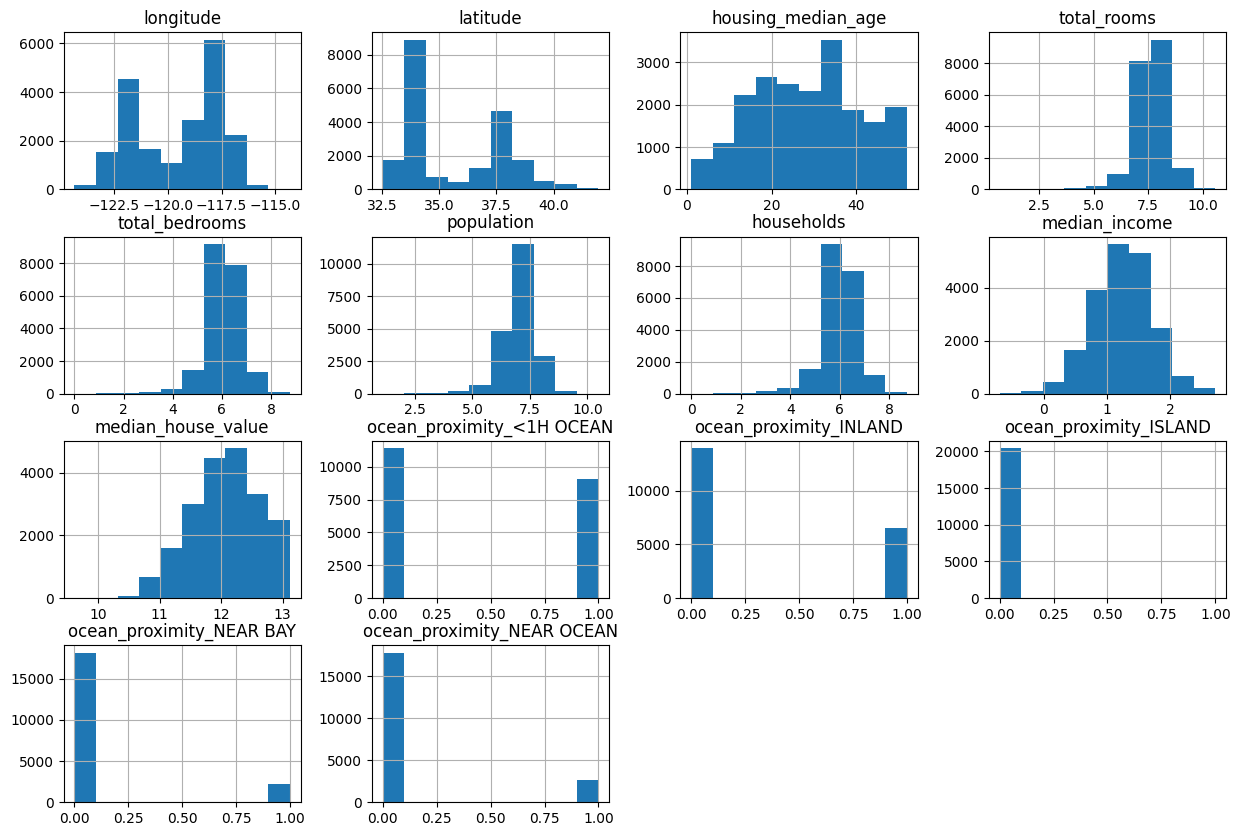

In [7]:
#Now we can see the normally distributed data
data.hist(figsize = (15,10))

In [8]:
#Seperating the feature and target values
X = data.drop('median_house_value', axis =1)
y = data['median_house_value']

In [9]:
#Now split the data for training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [10]:
#Scaling the data to equally for every feature
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

MODEL CREATION

In [11]:
#Here comes our model
# 3 Layers, Input with 64 neurons and activation of relu 
# Hidden with 32 neurons and activation of relu 
# Output with 1 neurons and activation of linear 
# And optimizer = Adam , Loss = Mean_squared_error, metrics = Mean_absolute_error

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim = 13),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
    ])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = optimizer ,loss= 'mean_squared_error', metrics = 'mae')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Fitting our model with epochs = 50 and validation split = 0.2

history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
409/409 [==============================] - 2s 5ms/step - loss: 0.1033 - mae: 0.2434 - val_loss: 0.0899 - val_mae: 0.2271
Epoch 2/100
409/409 [==============================] - 2s 4ms/step - loss: 0.1049 - mae: 0.2467 - val_loss: 0.1074 - val_mae: 0.2492
Epoch 3/100
409/409 [==============================] - 2s 4ms/step - loss: 0.1027 - mae: 0.2434 - val_loss: 0.0964 - val_mae: 0.2409
Epoch 4/100
409/409 [==============================] - 2s 4ms/step - loss: 0.1017 - mae: 0.2428 - val_loss: 0.0885 - val_mae: 0.2236
Epoch 5/100
409/409 [==============================] - 2s 4ms/step - loss: 0.1050 - mae: 0.2470 - val_loss: 0.1009 - val_mae: 0.2396
Epoch 6/100
409/409 [==============================] - 2s 4ms/step - loss: 0.1028 - mae: 0.2433 - val_loss: 0.1085 - val_mae: 0.2533
Epoch 7/100
409/409 [==============================] - 2s 4ms/step - loss: 0.1002 - mae: 0.2405 - val_loss: 0.1110 - val_mae: 0.2623
Epoch 8/100
409/409 [==============================] - 2s 4ms/step - 

PREDICTION

In [17]:
#Now we predicting with the test data
predict = model.predict(X_test)

#changing the pandas series to numpy
y = y_test.to_numpy()

128/128 [==============================] - 0s 1ms/step


PLOTTING THE MODEL LOSS

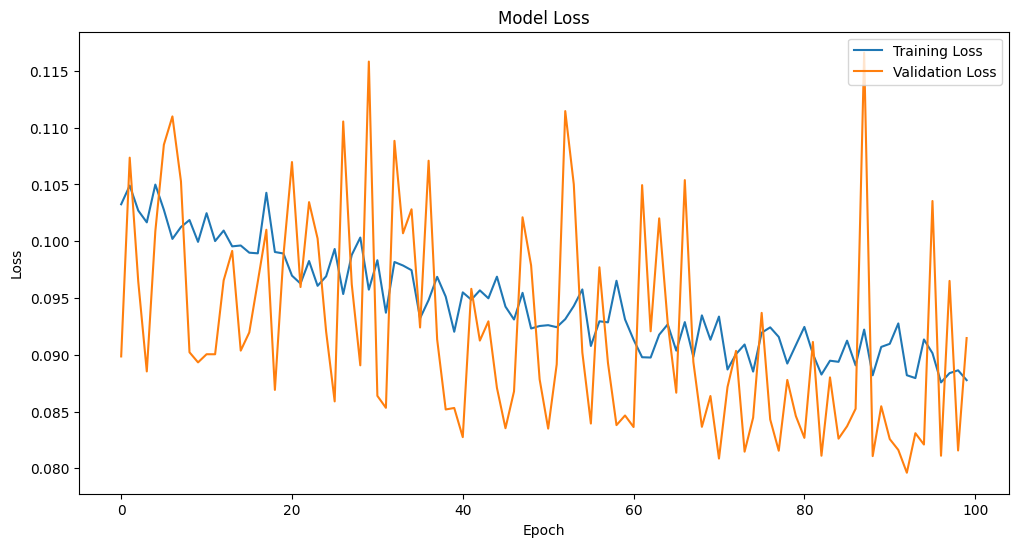

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [21]:
for i in range(20):
    
    print(f'Predicted value : {predict[i]}, Actual value : {y[i]}')

Predicted value : [12.122099], Actual value : 12.513557345278134
Predicted value : [12.090031], Actual value : 12.163686929033735
Predicted value : [12.671479], Actual value : 12.7446107078627
Predicted value : [11.775198], Actual value : 11.788281887731372
Predicted value : [11.64707], Actual value : 11.247656987355347
Predicted value : [12.50571], Actual value : 12.023951068738885
Predicted value : [12.295576], Actual value : 12.45722039325398
Predicted value : [11.757352], Actual value : 11.606415808057568
Predicted value : [12.349292], Actual value : 12.305465389408209
Predicted value : [11.623587], Actual value : 11.654425027243928
Predicted value : [11.493809], Actual value : 10.657259354912508
Predicted value : [11.931151], Actual value : 11.640438785269188
Predicted value : [12.905456], Actual value : 12.527068597011889
Predicted value : [12.187432], Actual value : 12.337977716410112
Predicted value : [11.805143], Actual value : 11.600020171821162
Predicted value : [12.820406],